In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('./Data/train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Exploration

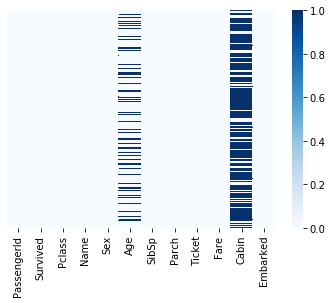

In [4]:
#Plot missing values of columns from training data
sns.heatmap(train.isnull(), yticklabels=False, cmap='Blues')
plt.show()

In [5]:
print("Total of entries: {0}".format(len(train)))
train.isnull().sum().sort_values(ascending=False)

Total of entries: 891


Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

As we can see from the heatmap, there are three columns have missing value: **Cabin**, **Age**, **Embarked**. While **Embarked** column have only 2 missing values, **Cabin** have 687 missing values and (77.1%) **Age** columns have 177 missing values (19.7%). Although having many missing values, but we can still consider the posibility of filling these missing values of **Age** column with mean value or some other ways. Otherwise, we may need to remove **Cabin** columns from our training data due to there are over 50% missing values.

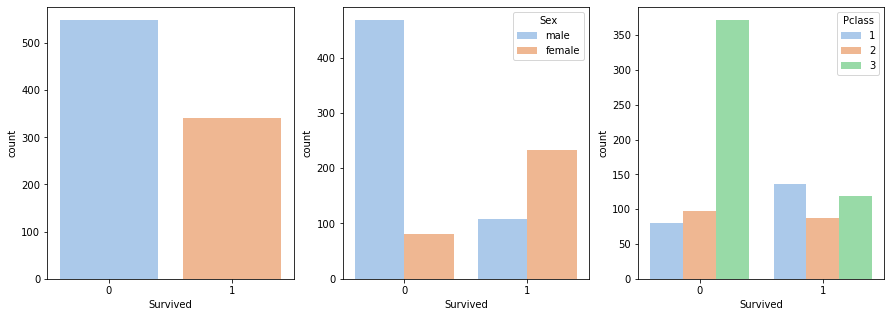

In [6]:
fig = plt.figure(figsize=(15,5))
#Plot survived data
ax1 = fig.add_subplot(1,3,1)
sns.countplot(x='Survived', data=train, palette='pastel', ax=ax1)
#Plot survived data with respect sex 
ax2= fig.add_subplot(1,3,2)
sns.countplot(x='Survived', hue='Sex', data=train, palette='pastel', ax=ax2)
#Plot survived data with respect Pclass (1: upper, 2:middle, 3:lower)
ax3 = fig.add_subplot(1,3,3)
sns.countplot(x='Survived', hue='Pclass', data=train, palette='pastel', ax=ax3)
plt.show()

We can easily realize that number of deaths is more than survived. men are die more than women, and there are also have some differences from the number of death with specific ticket class that is the lower the ticket class, the lower posibility to survive.

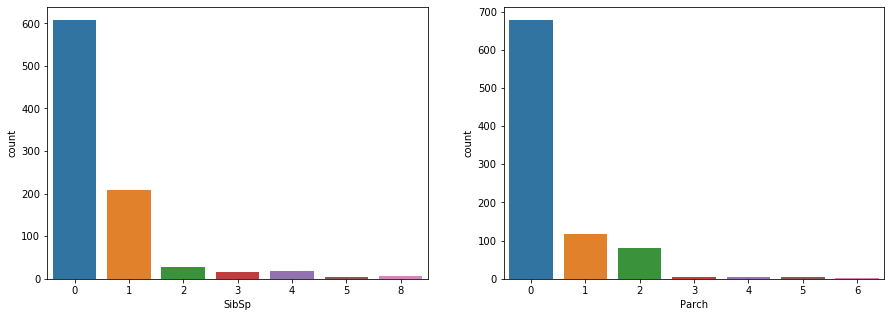

In [7]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
sns.countplot(x='SibSp', data=train, ax=ax1)
ax2 = fig.add_subplot(1,2,2)
sns.countplot(x='Parch', data=train, ax=ax2)
plt.show()

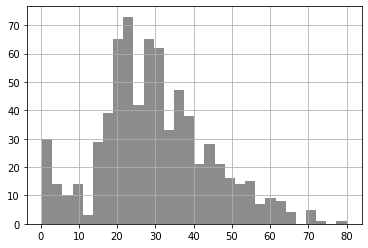

In [8]:
train['Age'].hist(bins=30, color='gray', alpha=0.9)

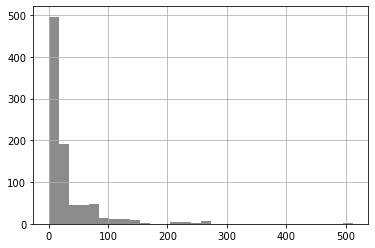

In [9]:
train['Fare'].hist(bins=30, color='gray', alpha=0.9)

# Data Cleaning

Now we are going to handle missing values from **Age** columns. We can use information from other columns to fill missing values of this columns since we have already known that there are about **20%** missing value in **Age** columns, this is a reasonable missing value percent that we cant think about filling missing values. 
We may use many ways to fill missing values than just using mean to fill.

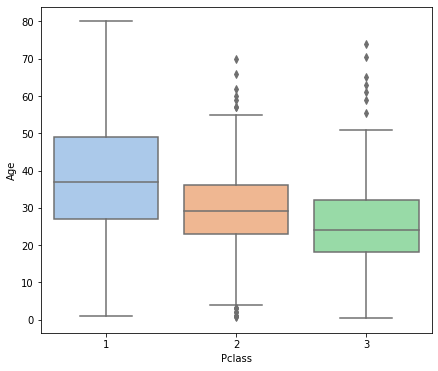

In [10]:
fig = plt.figure(figsize=(7,6))
sns.boxplot(x='Pclass', y='Age', data=train, palette='pastel')

In [11]:
train[['Pclass','Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


We see that the more weathier the passenger, the more older they tend to be,which makes sense. Therefore we can use mean Age of each Pclass to fill.

In [12]:
def fill_age_with_pclass(cols):
    age = cols['Age']
    pclass = cols['Pclass']
    if pd.isnull(age):
        if pclass == 1:
            return "38"
        elif pclass == 2:
            return "30"
        else:
            return "25"
    else:
        return age 

In [13]:
train['Age'] = train.apply(fill_age_with_pclass, axis=1)

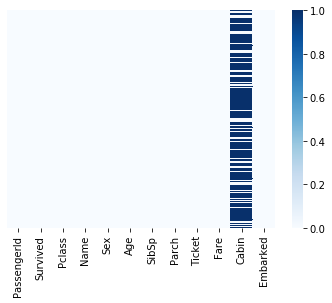

In [14]:
#Plot missing values of columns from training data
sns.heatmap(train.isnull(), yticklabels=False, cmap='Blues')
plt.show()

With heatmap above, we see that all missing values of **Age** were already filled. Now let's drop **Cabin** columns

In [15]:
train.drop(['Cabin'], axis=1, inplace=True)

Now check heatmap again

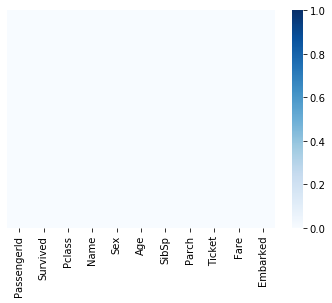

In [16]:
#Plot missing values of columns from training data
sns.heatmap(train.isnull(), yticklabels=False, cmap='Blues')
plt.show()